In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import os

def run_parameter_sweep(num_samples=2000, num_reruns=2, num_sims=5, num_timesteps=500, output_dir="./results"):
    """Run the parameter sweep using the C++ executable"""
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Get the absolute path to the executable
    current_dir = os.getcwd()
    project_root = os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(current_dir))))
    executable_path = os.path.join(current_dir, "build", "bin", "parameter_sweep")
    
    print(f"Looking for executable at: {executable_path}")
    if not os.path.exists(executable_path):
        raise FileNotFoundError(f"Parameter sweep executable not found at: {executable_path}")
    
    # Run the parameter sweep executable
    cmd = [
        executable_path,
        "--samples", str(num_samples),
        "--reruns", str(num_reruns),
        "--sims", str(num_sims),
        "--timesteps", str(num_timesteps),
        "--output", output_dir
    ]
    
    print(f"Running command: {' '.join(cmd)}")
    subprocess.run(cmd, check=True)
    
    # Find the CSV file in the output directory
    csv_files = [f for f in os.listdir(output_dir) if f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError("No CSV files found in output directory")
    
    # Read the most recent CSV file
    latest_csv = max(csv_files, key=lambda x: os.path.getctime(os.path.join(output_dir, x)))
    return pd.read_csv(os.path.join(output_dir, latest_csv))

# 1 - Run the Sweep. 
The data is saved inside a Pandas DataFrame

In [46]:
df = run_parameter_sweep()

Looking for executable at: /Users/UM/Documents/UM25/Learning/MV/build/bin/parameter_sweep
Running command: /Users/UM/Documents/UM25/Learning/MV/build/bin/parameter_sweep --samples 2000 --reruns 2 --sims 5 --timesteps 500 --output ./results
Starting parameter sweep...
Completed sample 1 of 2000 in 107 milliseconds.
Completed sample 2 of 2000 in 60 milliseconds.
Completed sample 3 of 2000 in 348 milliseconds.
Completed sample 4 of 2000 in 116 milliseconds.
Completed sample 5 of 2000 in 175 milliseconds.
Completed sample 6 of 2000 in 213 milliseconds.
Completed sample 7 of 2000 in 315 milliseconds.
Completed sample 8 of 2000 in 67 milliseconds.
Completed sample 9 of 2000 in 238 milliseconds.
Completed sample 10 of 2000 in 306 milliseconds.
Completed sample 11 of 2000 in 61 milliseconds.
Completed sample 12 of 2000 in 47 milliseconds.
Completed sample 13 of 2000 in 37 milliseconds.
Completed sample 14 of 2000 in 144 milliseconds.
Completed sample 15 of 2000 in 48 milliseconds.
Completed sa

# 2 - Plot results

In [48]:
    
plt.style.use('seaborn-v0_8')
df.head()

,sample,nr,dr,df,rf,avg_prey,std_prey,avg_predators,std_predators,normalized_prey
0,0,432,0.85250,0.146250,0.35225,432.0,0.0000,0.0,0.000000,1.000000
1,1,305,0.84175,0.170625,0.50550,305.0,0.0000,0.0,0.000000,1.000000
2,2,655,0.60925,0.138000,0.66700,364.7,12.0208,83.2,0.565685,0.556794
3,3,598,0.59050,0.042500,0.54525,83.9,86.1256,22.7,8.626700,0.140301
4,4,314,0.92025,0.028375,0.29525,111.0,46.1034,55.8,7.353910,0.353503


## Histograms

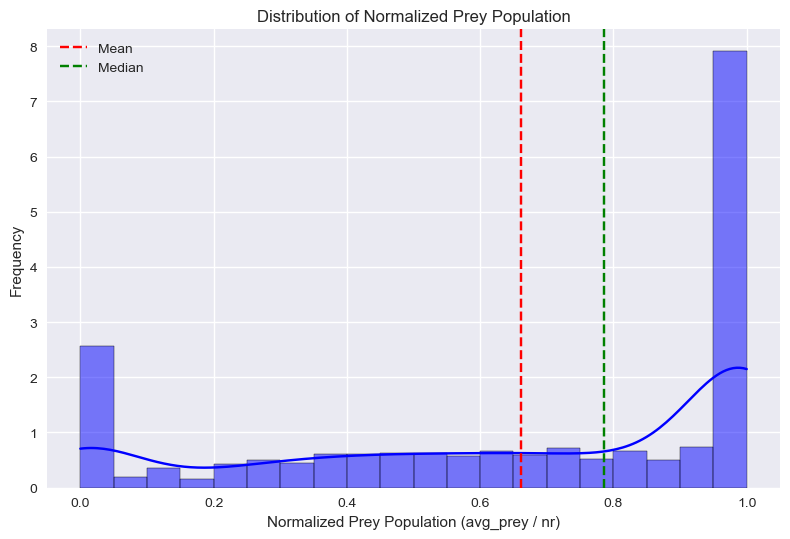

In [49]:
sns.histplot(df['normalized_prey'], kde=True, bins=20, color='blue', stat='density')
plt.axvline(df['normalized_prey'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['normalized_prey'].median(), color='green', linestyle='--', label='Median')
# plt.hist(df['normalized_prey'].to_numpy(), bins='auto', color='blue')

plt.xlabel('Normalized Prey Population (avg_prey / nr)')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Prey Population')
plt.legend()
plt.tight_layout()
plt.savefig("./results/normalized_prey_distribution.png", dpi=300)
plt.show()


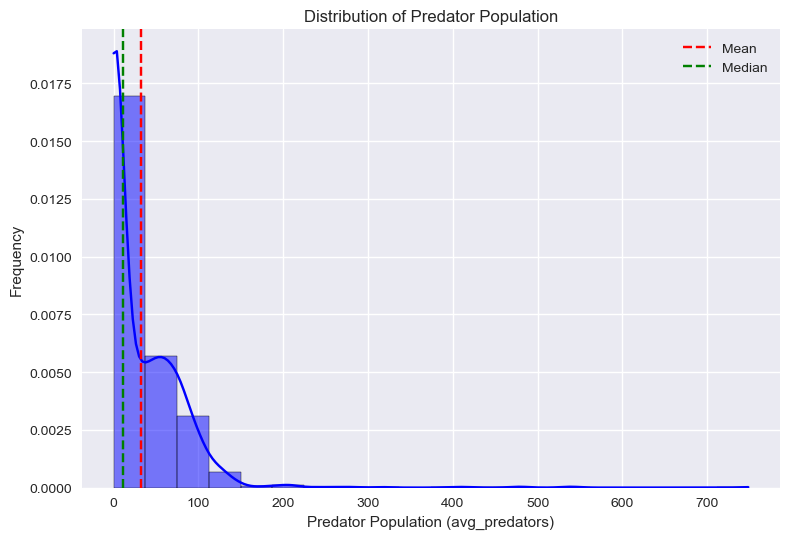

In [50]:
sns.histplot(df['avg_predators'], kde=True, bins=20, color='blue', stat='density')
plt.axvline(df['avg_predators'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['avg_predators'].median(), color='green', linestyle='--', label='Median')

plt.xlabel('Predator Population (avg_predators)')    
plt.ylabel('Frequency')
plt.title('Distribution of Predator Population')
plt.legend()
plt.tight_layout()
plt.savefig("./results/average_predator_distribution.png", dpi=300)
plt.show()

## Heatmaps
We plot heatmaps of each parameter against population averages. 

### Normalized Prey Population vs NR, DF, DR, RF

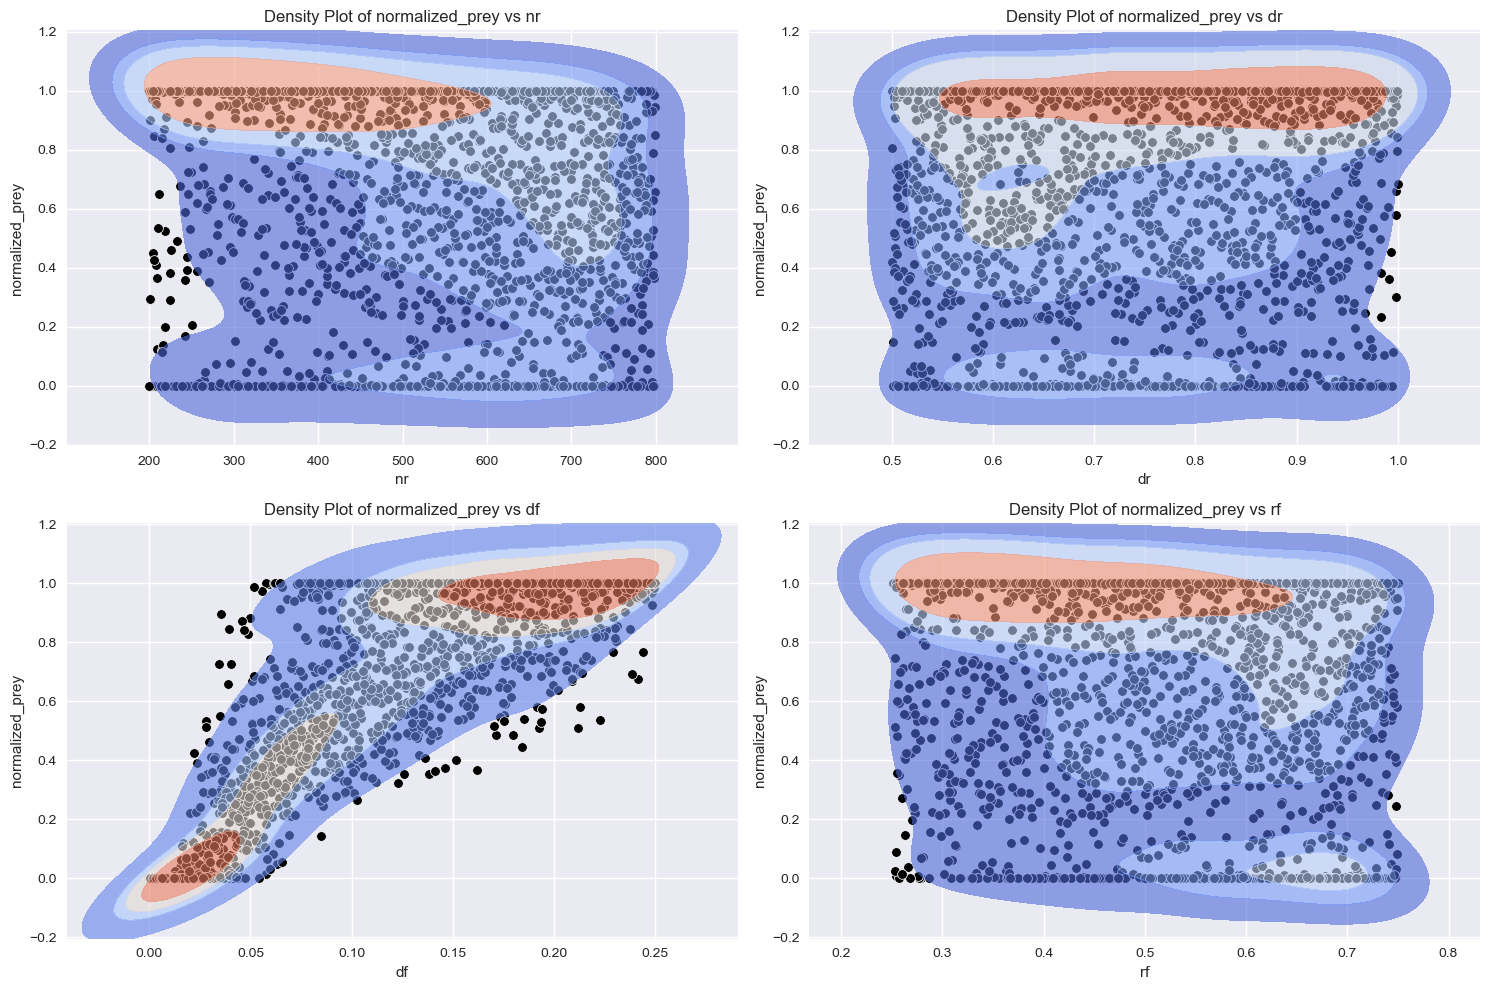

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
params = ['nr', 'dr', 'df', 'rf']
# Create a scatter plot with a density plot overlay

for i,param in enumerate(params):
    ax  = plt.subplot(2, 2, i+1)
    sns.scatterplot(
        data=df,
        x=param,
        y="normalized_prey",
        color="k",
    )
    sns.kdeplot(
        data=df,
        x=param,
        y="normalized_prey",
        levels=5,
        fill=True,
        alpha=0.6,
        cut=2,
        cmap="coolwarm",
        ax=ax)
    ax.set_xlabel(param)
    ax.set_ylabel('normalized_prey')
    ax.set_title(f'Density Plot of normalized_prey vs {param}')
plt.tight_layout()
plt.savefig("./results/normalized_prey_vs_params.png", dpi=300)
plt.show()

### Predator Population vs NR, DF, DR, RF

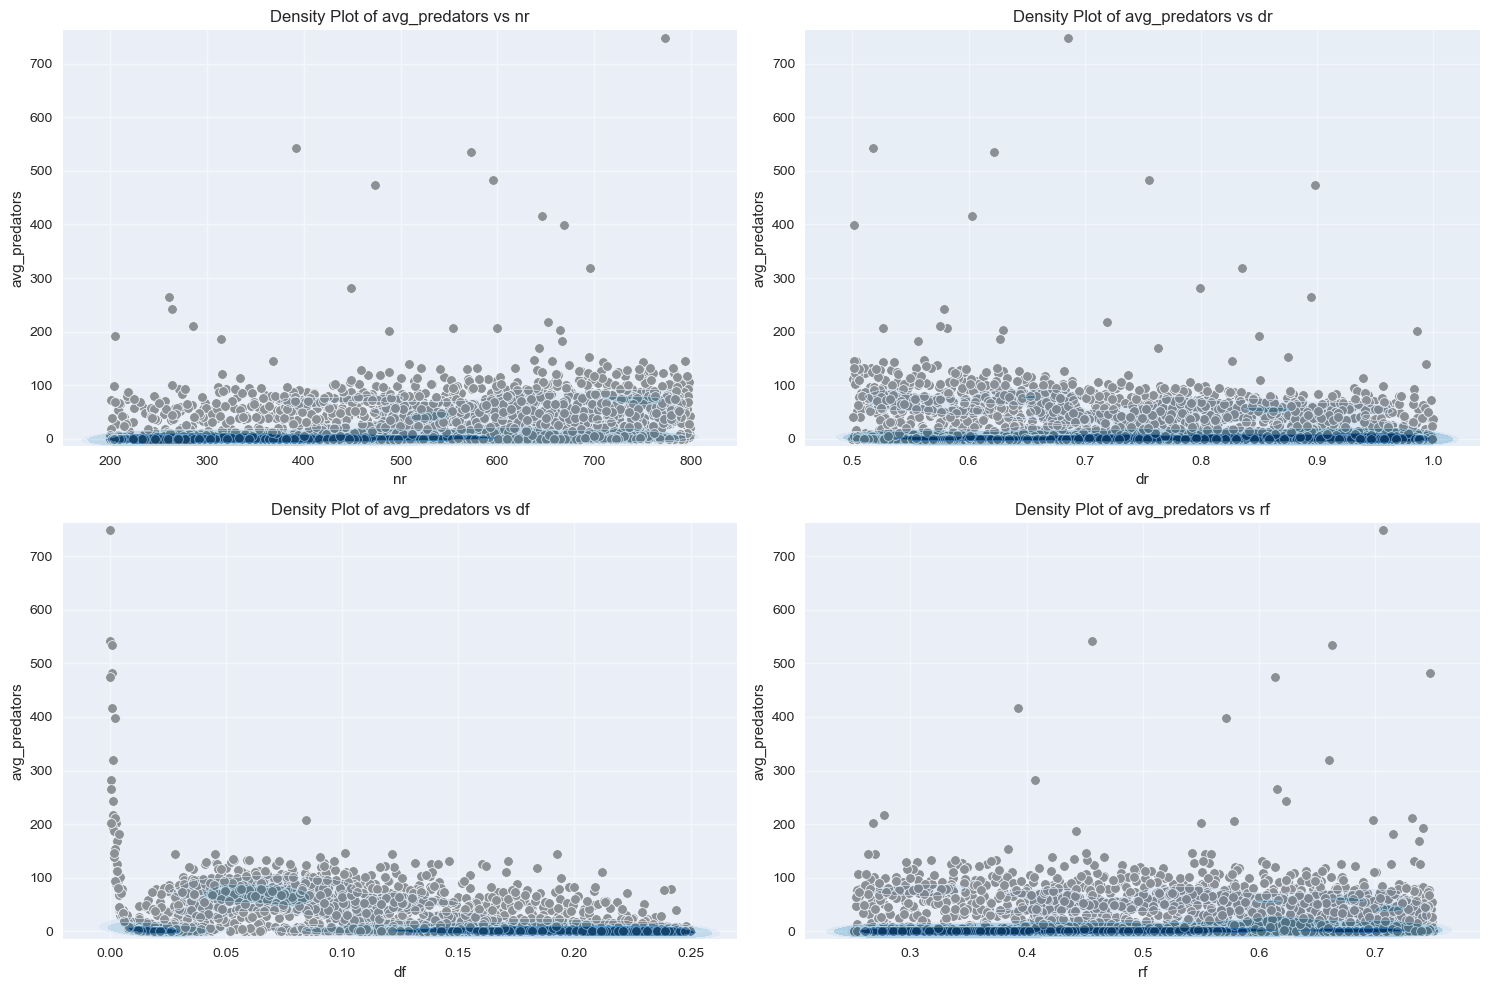

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
params = ['nr', 'dr', 'df', 'rf']

for i,param in enumerate(params):
    ax  = plt.subplot(2, 2, i+1)
    sns.scatterplot(
        data=df,
        x=param,
        y="avg_predators",
        color="k",
    )
    sns.kdeplot(
        data=df,
        x=param,
        y="avg_predators",
        levels=5,
        fill=True,
        alpha=0.6,
        cut=2,
        cmap="coolwarm",
        ax=ax)
    ax.set_xlabel(param)
    ax.set_ylabel('avg_predators')
    ax.set_title(f'Density Plot of avg_predators vs {param}')
plt.tight_layout()
plt.savefig("./results/avg_predators_vs_params.png", dpi=300)
plt.show()

## Two Parameter Heatmaps


/var/folders/mx/slrd_4mx3r71wjgg45nvz53w0000gr/T/ipykernel_41303/269438874.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['dr_bin', 'df_bin'])['normalized_prey'].mean().unstack()


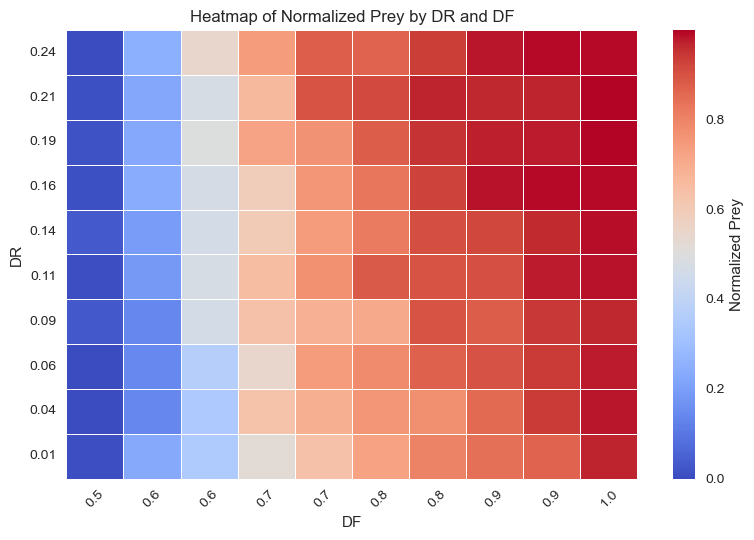

In [74]:
# Assuming df is your DataFrame with columns DR, DF, and normalized_prey
# First, we need to pivot the data into a matrix suitable for a heatmap
df['dr_bin'] = pd.cut(df['dr'], bins=10)  # 20 bins for DR
df['df_bin'] = pd.cut(df['df'], bins=10)  # 20 bins for DF

# Get the midpoints for labels
dr_midpoints = [(interval.left + interval.right)/2 for interval in df['dr_bin'].cat.categories]
df_midpoints = [(interval.left + interval.right)/2 for interval in df['df_bin'].cat.categories]

# Group by the bins and calculate the mean of normalized_prey for each bin
heatmap_data = df.groupby(['dr_bin', 'df_bin'])['normalized_prey'].mean().unstack()


# Create the heatmap
sns.heatmap(heatmap_data, 
            cmap='coolwarm',  # Color map
            # annot=True,      # Display values in cells
            fmt='.2f',       # Format for the annotations
            linewidths=0.5,  # Width of the lines that divide each cell
            cbar_kws={'label': 'Normalized Prey'},
            )

# Set x and y tick labels to the midpoints (rounded for clarity)
plt.xticks(np.arange(len(dr_midpoints)) + 0.5, [f"{x:.1f}" for x in dr_midpoints], rotation=45)
plt.yticks(np.arange(len(df_midpoints)) + 0.5, [f"{y:.2f}" for y in df_midpoints])

# Add title and labels
plt.title('Heatmap of Normalized Prey by DR and DF')
plt.xlabel('DF')
plt.ylabel('DR')

# Display the plot
plt.gca().invert_yaxis() # Default y-axis is inverted
plt.tight_layout()
plt.show()

## Correlation Coefficients Heatmap

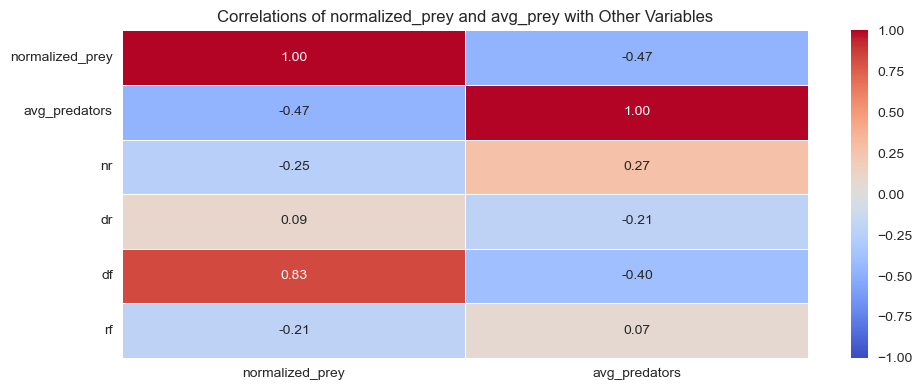

In [88]:

# If you want to see only how normalized_prey and avg_prey correlate with other variables
selected_columns = ['normalized_prey', 'avg_predators', 'nr', 'dr', 'df', 'rf']
correlation_matrix = df[selected_columns].corr().transpose()

# Select only the rows for normalized_prey and avg_prey
specific_correlations = correlation_matrix.loc[:,['normalized_prey', 'avg_predators']]

# Create the figure
plt.figure(figsize=(10, 4))

# Create the heatmap
sns.heatmap(specific_correlations, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            linewidths=0.5,
            vmin=-1, vmax=1)

plt.title('Correlations of normalized_prey and avg_prey with Other Variables')
plt.tight_layout()
plt.show()